In [24]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [25]:
data = pd.read_csv("forestfires.csv")
print('Dataset dimention: ',data.shape)
data.describe()

Dataset dimention:  (517, 11)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [26]:
data.isnull().any()
data = data.fillna(method='ffill')

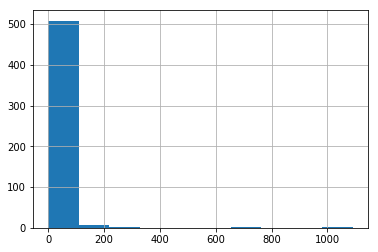

In [27]:
data['area'].hist()

In [28]:
data.corr()['area']

X       0.063385
Y       0.044873
FFMC    0.040122
DMC     0.072994
DC      0.049383
ISI     0.008258
temp    0.097844
RH     -0.075519
wind    0.012317
rain   -0.007366
area    1.000000
Name: area, dtype: float64

In [30]:
X = data.drop(['area'],axis=1).values
y = data['area'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [31]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("Accuracy",regressor.score(X_train, y_train)*100)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

Accuracy 3.4377143629223506


,Actual,Predicted
0,86.45,33.058572
1,0.00,11.506956
2,0.00,13.233263
3,7.31,6.705925
4,2.01,10.014004


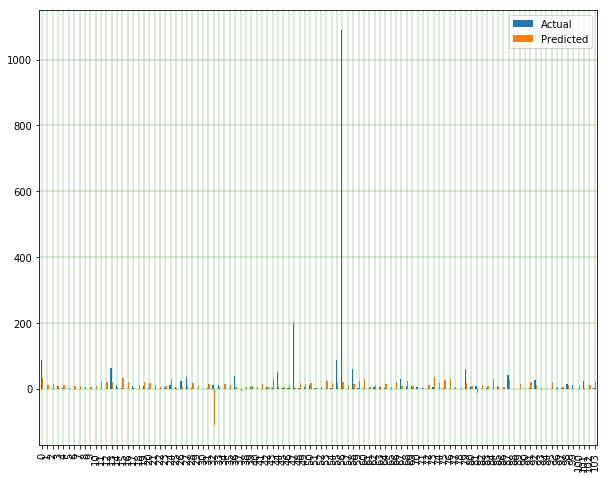

In [32]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))   
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.437113317122392
Root Mean Squared Error: 108.99850909573415
